<h3>Objective</h3>
<h4>The project was a part of "Data Visualization And Interpretation". The task involved the identification of the most effective visualization techniques, depending upon the dependent and independent features, for univariate and multivariate analysis. The work included the use of eight Gestalt principles of visual perception, decluttering techniques, and twelve pre-attentive attributes for effective visualization. These techniques help in directing the audience's attention to the most important take-away from the data.</h4>

Import the modules needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Displaying HTML like headings for tables and graphs
from IPython.display import display, HTML

# Import sys and warnings to ignore warning messages 
import sys
import warnings
%matplotlib inline
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Display all the columns of the dataframe
pd.pandas.set_option("display.max_columns", None)

Download the dataset and read it into a dataframe

In [2]:
# Reading dataset
file = "dvi-a2-ps8-data.csv"
data = pd.read_csv(file)

First five items in the dataset.

In [3]:
# Displaying top 5 rows
display(HTML('<b>Table 1: Displaying first 5 rows</b>'))
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Female,Sales Executive,Very High,Single,5993,8,Yes,11,Excellent,80,8,6,4,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,Male,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,80,10,10,7,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Male,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,80,7,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Female,Research Scientist,High,Married,2909,1,Yes,11,Excellent,80,8,8,7,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Male,Laboratory Technician,Medium,Married,3468,9,No,12,Excellent,80,6,2,2,2


Find out how many entries there are in the dataset.

In [4]:
# Understanding the shape of the data (i.e. # of entries & # of features)
data.shape

(1470, 23)

Clean up data. <br>
Remove unnecessary columns. Mention the reasons.<br>
Show the data.

In [5]:
# Getting information about the data
display(HTML('<b>Table 2: Data information</b>'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1470 non-null   int64 
 1   Attrition             1470 non-null   object
 2   BusinessTravel        1470 non-null   object
 3   DailyRate             1470 non-null   int64 
 4   Department            1470 non-null   object
 5   DistanceFromHome      1470 non-null   int64 
 6   Education             1470 non-null   object
 7   EducationField        1470 non-null   object
 8   EmployeeNumber        1470 non-null   int64 
 9   Gender                1470 non-null   object
 10  JobRole               1470 non-null   object
 11  JobSatisfaction       1470 non-null   object
 12  MaritalStatus         1470 non-null   object
 13  MonthlyIncome         1470 non-null   int64 
 14  NumCompaniesWorked    1470 non-null   int64 
 15  OverTime              1470 non-null   

In [6]:
# Displaying columns/features & unique entries to each features
display(HTML('<b>Table 3: Data features unique value display</b>'))
print(data.apply(lambda col: col.unique()))

Age                     [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                       [Yes, No]
BusinessTravel             [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate               [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department               [Sales, Research & Development, Human Resources]
DistanceFromHome        [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education               [College, Below College, Master, Bachelor, Doc...
EducationField          [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeNumber          [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
Gender                                                     [Female, Male]
JobRole                 [Sales Executive, Research Scientist, Laborato...
JobSatisfaction                            [Very High, Medium, High, Low]
MaritalStatus                                 [Single, Married, Divorced]
MonthlyIncome           [5993, 5130, 2

In [7]:
# 1. "EmployeeNumber" will not have any impact on the attrition rate.
# 2. "StandardHours" feature has only one entry.
# 3. No information is given regarding the "DailyRate".
# All three features will be removed from the dataset.
display(HTML('<b>Table 4: Displaying data after removing the three features</b>'))
data = data.drop(["DailyRate", "EmployeeNumber", "StandardHours"], axis=1)
data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,Female,Sales Executive,Very High,Single,5993,8,Yes,11,Excellent,8,6,4,5
1,49,No,Travel_Frequently,Research & Development,8,Below College,Life Sciences,Male,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,10,10,7,7
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,Male,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,7,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Master,Life Sciences,Female,Research Scientist,High,Married,2909,1,Yes,11,Excellent,8,8,7,0
4,27,No,Travel_Rarely,Research & Development,2,Below College,Medical,Male,Laboratory Technician,Medium,Married,3468,9,No,12,Excellent,6,2,2,2


### Finding correlation and describing which visualization technique used

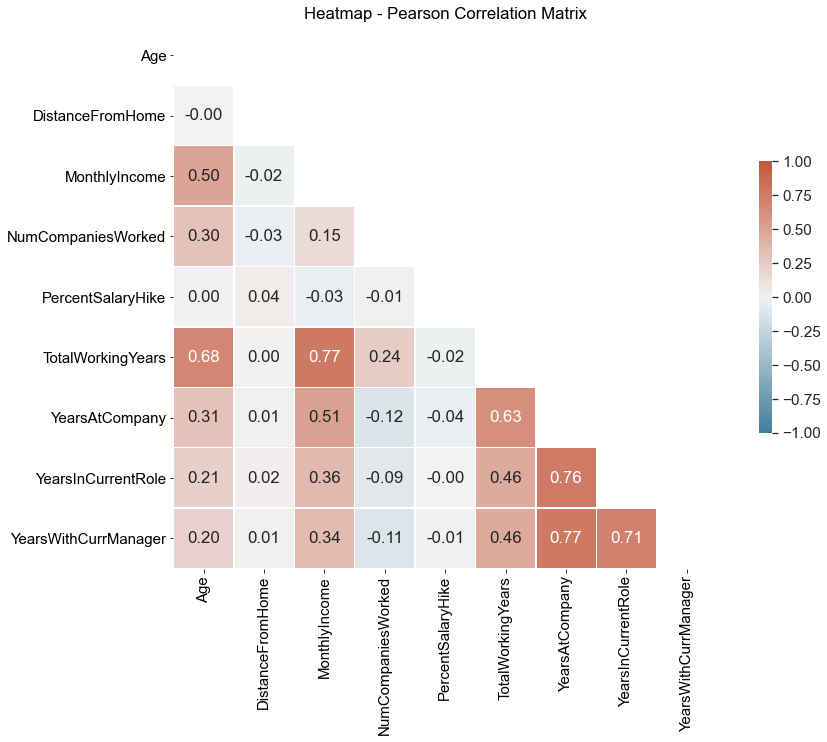

In [8]:
display(HTML('<b>Figure 1: Pearson Correlation Matrix</b>'))

corr_matrix = data.corr(method="pearson")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.set(font_scale=1.4)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 15)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix,
            mask=mask,
            cmap=cmap,
            vmin=-1., vmax=1., center=0, 
            annot=True, fmt='.2f',  
            cbar=True, cbar_kws={"shrink": .5},
            linewidths=0.5,
            square=True)
plt.title('Heatmap - Pearson Correlation Matrix')
ax.set_facecolor("White")
plt.show()

<h4>1. Summarise your findings from the visual.
    <br>i. Total monthly income increases with the increase in total years of experience.
    <br>ii. People in the same company stays more in the same role and under the same manager.
    <br>iii. There is slight correlation between age and monthly income and monthly income and years in the current company.<br>
<h4>2. The reason for selecting the chart type you did.
    <br>Problem task is to find the correlation between all the numerical features. In such case a heatmap is very useful in visualizing the concentration of values between two dimensions of a matrix. This helps in finding patterns and gives a perspective of depth through relative magnitude of the correlation values. Since, in a correlation we are more interested in a range (e.g. -1 to -0.75, -0.75 to -0.25, -0.25 to +0.25, +0.25 to +0.75 and +0.75 to +1), highlighting the strength and direction of relation, the heatmap is an effective way to quickly understand the correlation with the help of the color gradient as highlighted in label.<br>
<h4>3. Mention the pre-attentive attributes used.(atleast 2).
    <br>i. Hue to distinguish major correlation coefficient (different range).
    <br>ii. Intensity to distinguish correlation coefficient which are close to each other (within the range).
<h4>4. Mention the gestalt principles used.(atleast 2).
    <br>i. Similarity: Similar correlation values are given similar hue and intensity.
    <br>ii. Proximity: Correlation coefficient value is in proxmity to the respective cell hig.
    <br>iii. Proximity: Similarly X/Y axis labels with axis and legend values with colors gradient are in proximy.
    <br>iv. Figure and Ground: Keeping the background as well as 0 correlation values white, the focus goes only to the correlating values. 

### Finding the distribution of age in the dataset and desribing which visualization techniques used

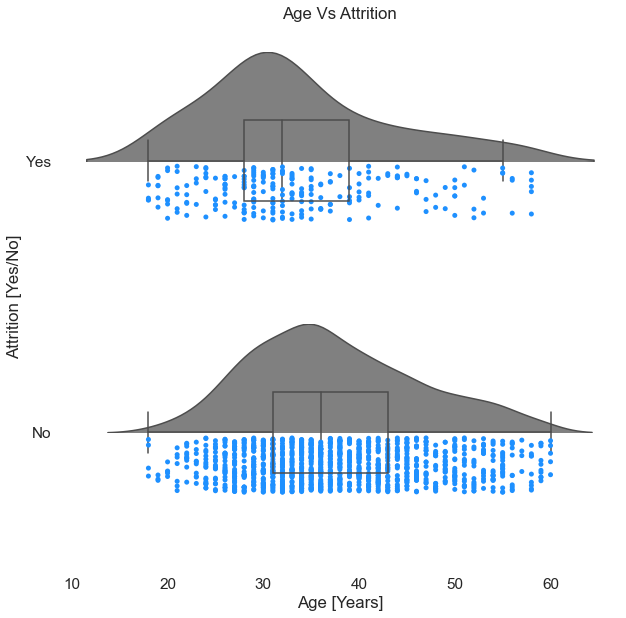

In [9]:
# Age vs Attrition
display(HTML('<b>Figure 2: Combined-plot Age distribution for each Attrition class</b>'))
plt.figure(figsize=(10,10), facecolor="white")
sns.set(font_scale=1.4)

ax = sns.violinplot(data=data, y="Attrition", x="Age",
                    scale="width", inner=None, color="grey")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax.transData))

sns.boxplot(y="Attrition", x="Age", data=data, saturation=1, showfliers=False,
            width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(y="Attrition", x="Age", data=data, color='dodgerblue', ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)

sns.despine(top=True, right=True, left=False, bottom=False)

plt.xlabel("Age [Years]")
plt.ylabel("Attrition [Yes/No]")
plt.title("Age Vs Attrition")
sns.despine(top=True, right=True, left=False, bottom=False)

ax.set_facecolor('white')
plt.show()

<h4>1. Summarise your findings from the visual.
    <br>i. The "Age" feature is distributed from -20 years age till +60 with majority of the age in 31 to 43 years age where 50 % of the population lies (36 being the median).
    <br>ii. From the data since for the both the "Attrition" class, the distribution is slightly right skewed, the overall age feature is right skewed.
    <br>iii. The overall data for "Attrition" class "No" is slightly shifted to the right indicating that the older employees are less likely to leave the company than the yonnger employees.
<h4>2. The reason for selecting the chart type you did.
    <br>The mix of density, box and dot plot has been used for ease of reading the data. Where distribution plot gives overall trend of the distribution of the data, box plot provides information including the % of population lying zone with 5 point statististical visualization. The dot plot gives information regarding the sample distribution among both the "Attrition" class levels (e.g. in this case there are more data with "No" class than in "Yes" class.<br>
<h4>3. Mention the pre-attentive attributes used.(atleast 2).
    <br>i. Different spatial position to distinguish with ease the "Yes" and "No" class.
    <br>ii. Box-plot line length indicates the starting and ending position representing the range of the age group in the specific attrition class type.
<h4>4. Mention the gestalt principles used.(atleast 2).
    <br>i. Proximity: For same class type, all the three graphs are in proximity.
    <br>ii. Closure: Though the plot boundaries are not drawn, but looking at the X-axis and Y-axis labels and the plots the boundary can be assumed.
    <br>iii. Figure and Ground: Keeping the background white, the focus goes only to the graph.

### Analyse the departmentwise attrition rate and desribing which visualization techniques used

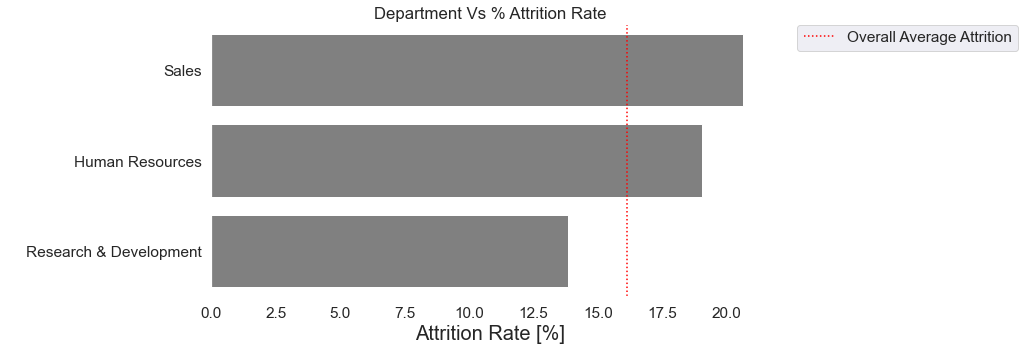

In [10]:
ratio_overall = data[data["Attrition"] == "Yes"].shape[0]/data.shape[0]
ratio_overall = ratio_overall*100

data_department = pd.DataFrame(columns=["Department", "PercentageLeaving"])
i=0
for field in list(data['Department'].unique()):
    ratio = data[(data['Department']==field) & (data['Attrition']=="Yes")].shape[0] / data[data['Department']==field].shape[0]
    data_department.loc[i] = (field, ratio*100)
    i += 1
    
# Department vs Attrition Rate
display(HTML('<b>Figure 3: Departmentwise % Attrition Rate Trend</b>'))
plt.figure(figsize=(10,5), facecolor="white")
sns.set(font_scale=1.4)

ax = sns.barplot(data=data_department, y="Department", x="PercentageLeaving", color="grey",
                order=data_department.sort_values('PercentageLeaving',ascending = False).Department)
plt.axvline(ratio_overall, linestyle=":", color="red", label="Overall Average Attrition")
plt.xlabel("Attrition Rate [%]", fontsize=20)
plt.ylabel(" ")
plt.title("Department Vs % Attrition Rate")
plt.legend(loc="upper left", ncol=2, bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

ax.set_facecolor('white')
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

<h4>1. Summarise your findings from the visual.
    <br>i. The rate of people leaving the company is higher in Sales department followed by HR and Research and Development.
    <br>ii. Sales and HR department has attrition rate higher than the overall average attrition rate of 16%. 
<h4>2. The reason for selecting the chart type you did.
    <br>i. As bar charts are common it is leveraged because of its low learning curve.
    <br>ii. Bar charts are easy for eyes to read.
    <br>iii. For ease of department name reading the horizontal bar chart has been selected in this case.
    <br>iv. Also, through sorting it is easy to understand the department with highest attrition rate.
<h4>3. Mention the pre-attentive attributes used.(atleast 2).
    <br>i. Line length: Bar length makes it easy to understand the attrition rate trend among different departments.
    <br>ii. Added marks: Showing average attrition rate makes it comfortable to understand the department with attrition rate higher than the overall average attrition rate.
<h4>4. Mention the gestalt principles used.(atleast 2).
        <br>i. Proximity: Department is in proximity with the respective bars.
    <br>ii. Closure: Though the plot boundaries are not drawn, but looking at the X-axis and Y-axis labels and the plots the boundary can be assumed.
    <br>iii. Figure and Ground: Keeping the background white, the focus goes only to the graph and the average vertical line.

### Identify the top 5 job roles with highest attrition rate and describing which data visualization techniques used

In [11]:
# Displaying unique values counts for JobRole
data["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

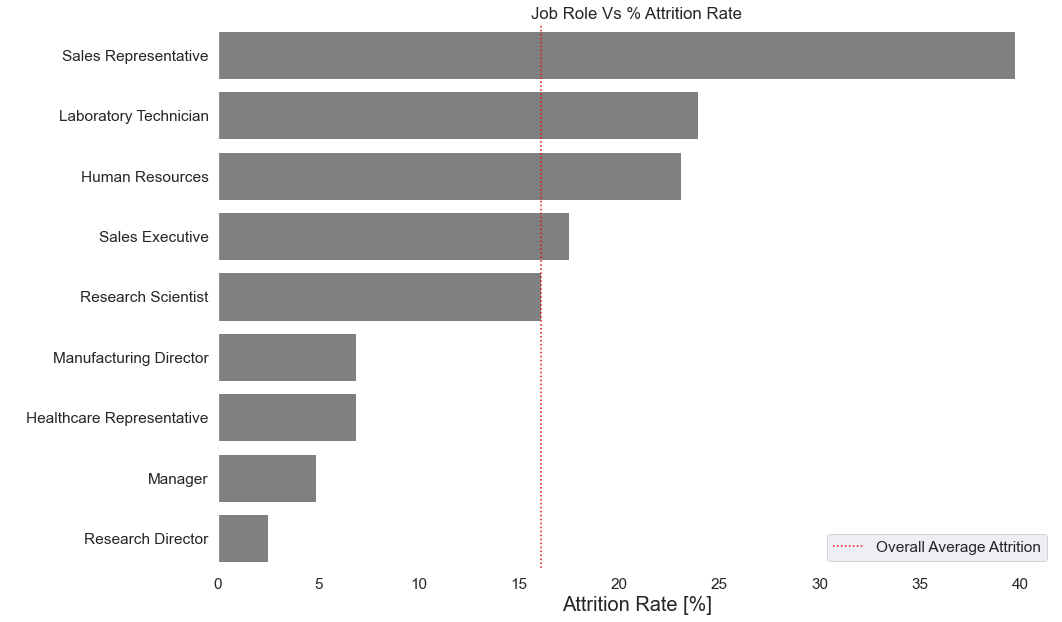

In [12]:
data_jobroles = pd.DataFrame(columns=["JobRole", "PercentageLeaving"])
i=0
for field in list(data['JobRole'].unique()):
    ratio = data[(data['JobRole']==field) & (data['Attrition']=="Yes")].shape[0] / data[data['JobRole']==field].shape[0]
    data_jobroles.loc[i] = (field, ratio*100)
    i += 1

# Job Role vs Attrition Rate
display(HTML('<b>Figure 4: Job Role Vs % Attrition Rate Trend</b>'))
plt.figure(figsize=(15,10), facecolor="white")
sns.set(font_scale=1.4)

ax = sns.barplot(data=data_jobroles, y="JobRole", x="PercentageLeaving", color="grey",
                order=data_jobroles.sort_values('PercentageLeaving',ascending = False).JobRole)
plt.axvline(ratio_overall, linestyle=":", color="red", label="Overall Average Attrition")
plt.xlabel("Attrition Rate [%]",fontsize=20)
plt.ylabel(" ")
plt.title("Job Role Vs % Attrition Rate")
plt.legend(loc="lower right")

ax.set_facecolor('white')
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

<h4>1. Summarise your findings from the visual.
    <br>i. The rate of people leaving the company is in-line with the department in the previous chart where Sales Representatives, Sales Executives are from Sales department, HR employees are third and Laboratory Technicians, Research Scientists are from Research and Development department.
    <br>ii. The attrition rate for all these roles are higher than the overall average attrition rate.
    <br> iii. People at higher position, Directors and Managers are less likey to leave the company compared to those at exective positions.
<h4>2. The reason for selecting the chart type you did.
    <br>i. As bar charts are common it is leveraged because of its low learning curve.
    <br>ii. Bar charts are easy for eyes to read.
    <br>iii. For ease of job role names reading the horizontal bar chart has been selected in this case.
    <br>iv. Also, through sorting it is easy to understand the job roles with highest attrition rate.
<h4>3. Mention the pre-attentive attributes used.(atleast 2).
    <br>i. Line length: Bar length makes it easy to understand the attrition rate trend among different job roles.
    <br>ii. Added marks: Showing average attrition rate makes it comfortable to understand the job roles with attrition rate higher than the overall average attrition rate.
<h4>4. Mention the gestalt principles used.(atleast 2).
        <br>i. Proximity: Job roles are in proximity with the respective bars.
    <br>ii. Closure: Though the plot boundaries are not drawn, but looking at the X-axis and Y-axis labels and the plots the boundary can be assumed.
    <br>iii. Figure and Ground: Keeping the background white, the focus goes only to the graph and the average vertical line.

### Multivariate analysis - Identify the top 2 highly correlated features. Analyse (use a single visual), how they relate to "number of years in the company" and their combined effect on attrition

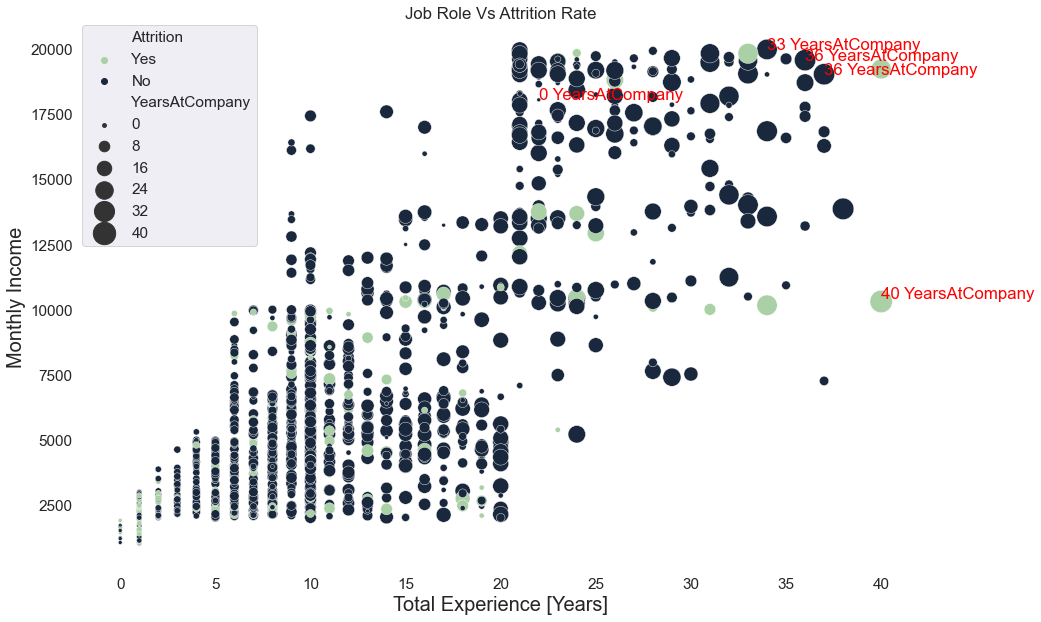

In [13]:
# As observed earlier in the correlation heatmap, "TotalWorkingYears" and "MonthlyIncome" 
# are the two features which are highly correlated
high_current_high_earn = data[(data['JobRole']==field) & (data['Attrition']=="Yes")].shape[0] / data[data['JobRole']==field].shape[0] 
# Total Working Years Vs Monthly Income wity Years at Company
display(HTML('<b>Figure 5: Monthly Income with Total Experience and Years in Company</b>'))
plt.figure(figsize=(15,10), facecolor="white")
sns.set(font_scale=1.4)
ax=sns.scatterplot(data=data, x="TotalWorkingYears", y="MonthlyIncome", 
                   hue="Attrition", palette="ch:r=-.5,l=.75",
                   size="YearsAtCompany", sizes=(15, 500));
plt.xlabel("Total Experience [Years]",fontsize=20)
plt.ylabel("Monthly Income",fontsize=20)
plt.title("Job Role Vs Attrition Rate")
plt.legend(loc="upper left", ncol=1, bbox_to_anchor=(0.0, 1), borderaxespad=0.,
          mode=None)
plt.text(40, 10413, '40 YearsAtCompany', color="red")
plt.text(36, 19586, '36 YearsAtCompany', color="red")
plt.text(37, 19045, '36 YearsAtCompany', color="red")
plt.text(22, 18061, '0 YearsAtCompany', color="red")
plt.text(34, 19999, '33 YearsAtCompany', color="red")
ax.set_facecolor('white')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

<h4>1. Summarise your findings from the visual.
    <br>i. Monthly income increases with the increase in total year of experience.
    <br>ii. After 20 years of experience, employees are likely to earn at least 5000 compared to those with less than 20 years of experience.
    <br>iii. There is no visible trend which shows that those who are at the company for more number of years tend to earn higher. Even those with less number of years at the company are earning higher.
    <br>iv. Those with low years of experience and low income are more likely to change the company (as there are more green circle in the lower left side of the graph compared to upper right part).
<h4>2. The reason for selecting the chart type you did.
    <br>i. For multivariate anlaysis, there are usually two approaches - Grouping and Faceting.
    <br>ii. For the ease of comparing discrete x-axis and numerical y-axis scatter plot has been used.
    <br>iii. Third dimension through years at company has been added as a size parameter because of the ratio data type which can be sorted based on years of experience.
    <br>iv. Fourth diemnsion of Attrition has been added as color.
    <br>iv. Mixing all four dimensions for multivariate analysis gives ease of visualizing the data.
<h4>3. Mention the pre-attentive attributes used.(atleast 2).
    <br>i. Use of text annotation to highlight those who have spent most and least years at the company.
    <br>ii. Use of hue and size for the ease of identification of years at company.
<h4>4. Mention the gestalt principles used.(atleast 2).
    <br>i. Proximity: Text annotation in proximity to the data it is trying to highlight.
    <br>ii. Similarity: Those earning similar income are shown with similar hue and those with same years at company are shown with similar scatter size.
    <br>iii. Closure: Though the plot boundaries are not drawn, but looking at the X-axis and Y-axis labels and the plots the boundary can be assumed.
    <br>iv. Figure and Ground: Keeping the background white, the focus goes only to the graph.
    <br>v. Focal point: To highlight those with highest and least year at company, red-colored text annotation is used.

### Few other Exploratory Data Analysis 

<h4>Q.1. How effective is the performance rating to resist the attrition?

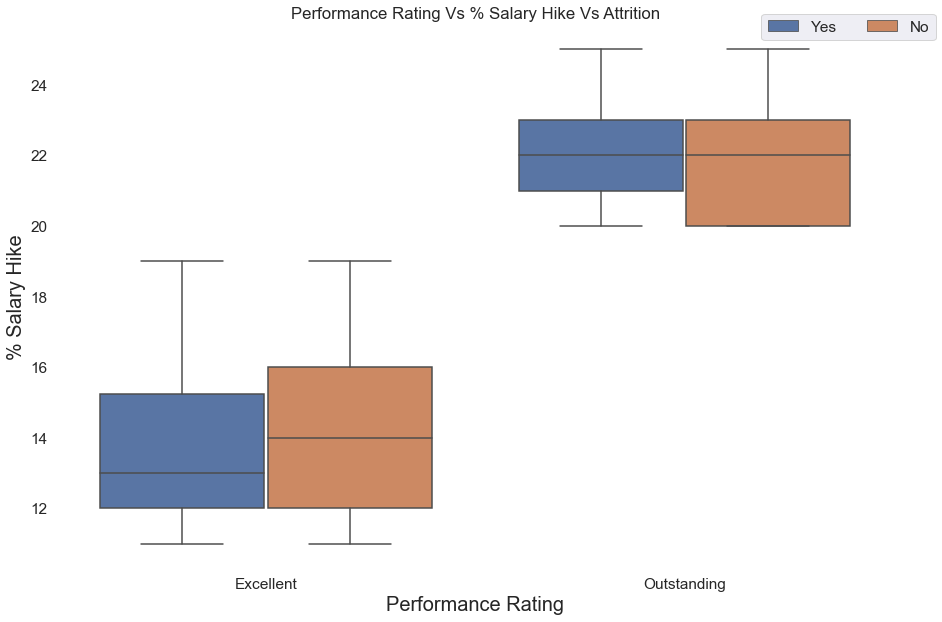

In [14]:
# Total Working Years Vs Monthly Income wity Years at Company
display(HTML('<b>Figure 6: Impact of Performance Rating and % Salary Hike on Attrition</b>'))
plt.figure(figsize=(15,10), facecolor="white")
sns.set(font_scale=1.4)
ax=sns.boxplot(data=data, x = 'PerformanceRating', y='PercentSalaryHike',
               hue = 'Attrition')
plt.xlabel("Performance Rating",fontsize=20)
plt.ylabel("% Salary Hike",fontsize=20)
plt.title("Performance Rating Vs % Salary Hike Vs Attrition")
plt.legend(loc="upper right", ncol=2, bbox_to_anchor=(1.05, 1.02), borderaxespad=0.)

ax.set_facecolor('white')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

<h4>1. Summarise your findings from the visual.
    <br>i. Clearly, those with outstanding performance rating tend to get higher percentage salary hike.
    <br>ii. From both the box plot, it is visible that the overall distribution of those who are not leaving the company compared to those who are leaving are more or less similar.
    <br>iii. However, more number of population percentage (50 percentage zone) among the leaving candidates who got outstanding performance rating are leaving.
<h4>2. The reason for selecting the chart type you did.
    <br>i. Box-plot is an ideal visualization to understand 5 summary (min, 1st quartile, median, 3rd quartile, and max) for numerical data.
    <br>ii. Side-by-side box plot is an ideal graph for Categorical Vs Numerical data visualization.
    <br>iii. For the current task we need to analyse the Performance (Categorical) Vs % Salary Hike (numerical) thus the side by side boxplot with hue based third parameter (Attrition) analysis has been selected.<br>
<h4>3. Mention the pre-attentive attributes used.(atleast 2).
    <br>i. Different spatial position to distinguish with ease the Performance Rating.
    <br>ii. Box-plot length indicates the starting and ending position representing the range of the % salary hike in the specific attrition class type.
<h4>4. Mention the gestalt principles used.(atleast 2).
    <br>i. Proximity: For same performance type, the box plot are in proximity.
    <br>ii. Similar attrition class has been assigned similar color for ease of identification.
    <br>iii. Figure and Ground: Keeping the background white, the focus goes only to the graph.

<h4>Q.2. What is the relation between gender wise job satisfaction for all the employees?.

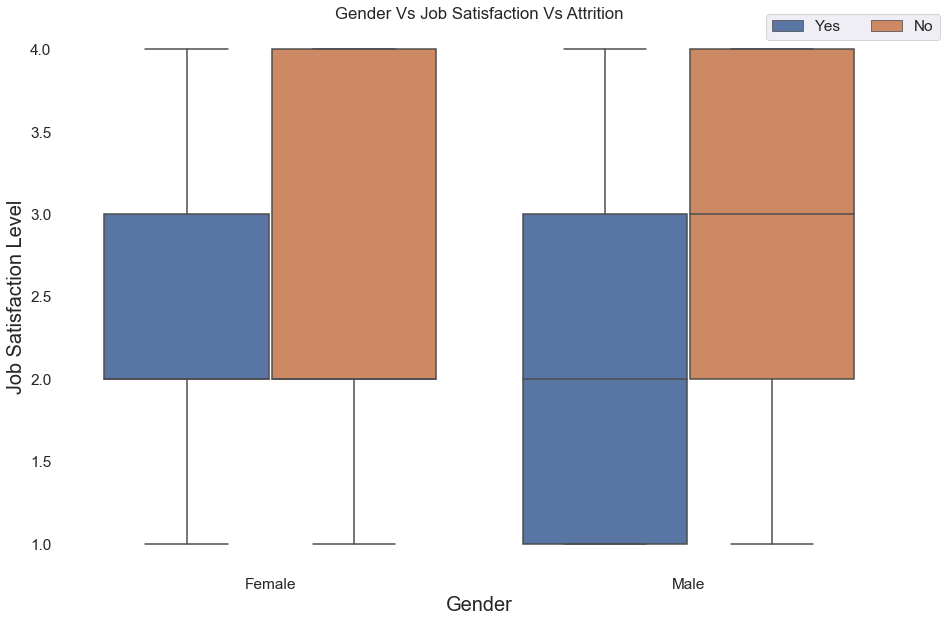

In [15]:
_jobsatisfaction = {"Low": 1,
                   "High": 2,
                   "Medium": 3,
                   "Very High": 4}
data["JobSatisfaction"] = data["JobSatisfaction"].map(_jobsatisfaction)

# Total Working Years Vs Monthly Income wity Years at Company
display(HTML('<b>Figure 7: Impact of Gender and Job Satisfaction on Attrition</b>'))
plt.figure(figsize=(15,10), facecolor="white")
sns.set(font_scale=1.4)
ax=ax = sns.boxplot(data=data, x = 'Gender', y='JobSatisfaction', hue = 'Attrition')
plt.xlabel("Gender",fontsize=20)
plt.ylabel("Job Satisfaction Level",fontsize=20)
plt.title("Gender Vs Job Satisfaction Vs Attrition")
plt.legend(loc="upper right", ncol=2, bbox_to_anchor=(1.05, 1.02), borderaxespad=0.)

ax.set_facecolor('white')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

<h4>1. Summarise your findings from the visual.
    <br>i. For male, those with low job satisfaction level are more likely to leave the company.
    <br>ii. For female, though job satisfaction has no visible trend, but confidence on those who have less job satisfaction are likely to change the company (i.e. distribution of leaving is less than not leaving).
<h4>2. The reason for selecting the chart type you did.
    <br>i. Box-plot is an ideal visualization to understand 5 summary (min, 1st quartile, median, 3rd quartile, and max) for numerical data.
    <br>ii. Side-by-side box plot is an ideal graph for Categorical Vs Numerical data visualization.
    <br>iii. For the current task we need to analyse the gender (Categorical) Vs job satisfaction level (numerical) thus the side by side boxplot with hue based third parameter (Attrition) analysis has been selected.<br>
<h4>3. Mention the pre-attentive attributes used.(atleast 2).
    <br>i. Different spatial position to distinguish with ease the Gender.
    <br>ii. Box-plot length indicates the starting and ending position representing the range of the job satisfaction levels in the specific attrition class type.
<h4>4. Mention the gestalt principles used.(atleast 2).
    <br>i. Proximity: For same gender type, the box plot are in proximity.
    <br>ii. Similar attrition class has been assigned similar color for ease of identification.
    <br>iii. Figure and Ground: Keeping the background white, the focus goes only to the graph.

<h4>Q.3. What is the impact of monthly income on attrition?.

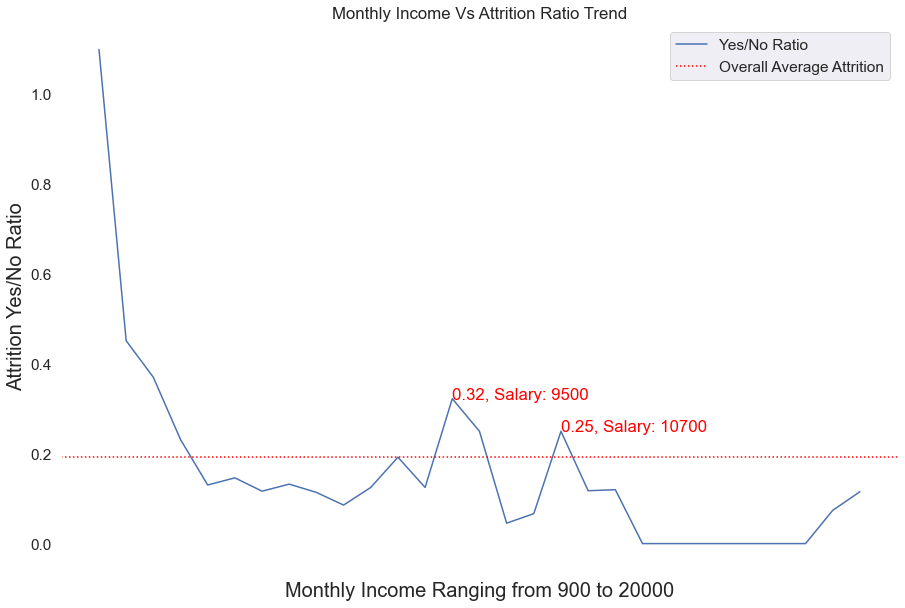

In [16]:
ratio_overall = data[data["Attrition"] == "Yes"].shape[0]/data[data["Attrition"] == "No"].shape[0]

attrition_income = data[['Attrition', 'MonthlyIncome']].sort_values(by=['MonthlyIncome'])

#number of bins is chosen to be 30
bins = np.linspace(900, 20000, 30)
attrition_income['binning'] = pd.cut(attrition_income['MonthlyIncome'], bins)

#getting yes and no count for the binned salary.
income_yes = attrition_income[attrition_income["Attrition"].str.match('Yes')]
income_yes_sorted= income_yes.groupby(by =['binning']).size().reset_index()
income_no = attrition_income[attrition_income["Attrition"].str.match('No')]
income_no_sorted= income_no.groupby(by =['binning']).size().reset_index()

#merging the tables
merged_data = pd.merge(income_yes_sorted, income_no_sorted, on = 'binning').rename(columns={"0_x": "Yes", "0_y":"No"})

#finding the ratio
def get_ratio_yes_no(row):
    return row['Yes']/ row['No']
merged_data['Yes_No_Ratio'] = merged_data.apply(get_ratio_yes_no, axis =1)
merged_data.sort_values(by = 'Yes_No_Ratio')

merged_data

# Total Working Years Vs Monthly Income wity Years at Company
display(HTML('<b>Figure 8: Monthly Income on Attrition Trend</b>'))
sns.set(font_scale=1.4)
ax = merged_data.plot(x="binning", y="Yes_No_Ratio", figsize=(15,10), legend=False, label="Yes/No Ratio")
plt.text(13, 0.32, '0.32, Salary: 9500', color="red")
plt.text(17, 0.25, '0.25, Salary: 10700', color="red")
ax.set_xticklabels([])
plt.axhline(ratio_overall, linestyle=":", color="red", label="Overall Average Attrition")

plt.xlabel("Monthly Income Ranging from 900 to 20000",fontsize=20)
plt.ylabel("Attrition Yes/No Ratio",fontsize=20)
plt.title("Monthly Income Vs Attrition Ratio Trend")
plt.legend(loc="upper right")

ax.set_facecolor('white')
sns.despine(top=True, right=True, left=False, bottom=False)

<h4>1. Summarise your findings from the visual.
    <br>i. As clearly visible from the trend, those who earn more are less likely leave the company.
    <br>ii. With the increase in the monthly income, the attrition ratio goes significantly below the overall average attrition ratio of 0.16.
<h4>2. The reason for selecting the chart type you did.
    <br>i. Line graph is the most common plot to represent continuous data. 
    <br>ii. The line graph implies connection between the points and thus in this case where we need to analyze the impact of increase in monthly salary (thus connection as regular numerical data type) on attrition rate, line graph is selected.
    <br>iii. Also, since he interest is in the trend and not in the actual value, the x-axis labels is removed and only the text is kept to focus only on the trend.
<h4>3. Mention the pre-attentive attributes used.(atleast 2).
    <br>i. Overall average attrition ratio trend line to keep focus on the trend Vs average attrition.
    <br>ii. Annotatin text and color to highlight the points where the attrition ratio has jumped beyond the overall average attrition ratio. 
<h4>4. Mention the gestalt principles used.(atleast 2).
    <br>i. Connection: Line graph showing connection through trend.
    <br>ii. Closure: Though the plot boundaries are not drawn, but looking at the X-axis and Y-axis labels and the plots the boundary can be assumed.
    <br>iii. Figure and Ground: Keeping the background white, the focus goes only to the graph.
    <br>iv. Proximity of the axis labels and annotation.

<h1><center> ************ END ****************</center></h1>